In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D, Reshape
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json
from keras import backend as K

Using TensorFlow backend.


In [2]:
import numpy as np

n = 100000
x_train = np.zeros((n,2))
y_train = np.zeros((n,))
for i in range(n):
    x_train[i,0] = np.random.choice([-1,1])
    x_train[i,1] = np.random.choice([-1,1])
    if x_train[i,0] == 1 and x_train[i,1] == 1 or x_train[i,0] == -1 and x_train[i,1] == -1:
        y_train[i] = -1
    else:
        y_train[i] = 1

x_train = x_train.reshape(n, 2,)

n = 1000
x_test = np.zeros((n,2))
y_test = np.zeros((n,))
for i in range(n):
    x_test[i,0] = np.random.choice([-1,1])
    x_test[i,1] = np.random.choice([-1,1])
    if x_test[i,0] == 1 and x_test[i,1] == 1 or x_test[i,0] == -1 and x_test[i,1] == -1:
        y_test[i] = -1
    else:
        y_test[i] = 1

x_test = x_test.reshape(n, 2,)

print(x_test[0].T)
print(y_test[0])

[ 1.  1.]
-1.0


In [3]:
input_shape = (2,)

model = Sequential()
model.add(Dense(2, activation='tanh',
                 input_shape=input_shape))

model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='tanh'))

model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [5]:
epochs = 10
batch_size = 128
# Fit the model weights.
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 100000 samples, validate on 1000 samples
Epoch 1/10
100000/100000 [==============================] - 1s 11us/step - loss: 1.0335 - acc: 0.1940 - val_loss: 0.8889 - val_acc: 0.2510
Epoch 2/10
100000/100000 [==============================] - 1s 7us/step - loss: 0.7138 - acc: 0.3557 - val_loss: 0.5834 - val_acc: 0.4850
Epoch 3/10
100000/100000 [==============================] - 1s 7us/step - loss: 0.5364 - acc: 0.4999 - val_loss: 0.5328 - val_acc: 0.4850
Epoch 4/10
100000/100000 [==============================] - 1s 8us/step - loss: 0.5117 - acc: 0.4999 - val_loss: 0.5219 - val_acc: 0.4850
Epoch 5/10
100000/100000 [==============================] - 1s 7us/step - loss: 0.5053 - acc: 0.4999 - val_loss: 0.5183 - val_acc: 0.4850
Epoch 6/10
100000/100000 [==============================] - 1s 8us/step - loss: 0.5007 - acc: 0.4999 - val_loss: 0.4992 - val_acc: 0.4850
Epoch 7/10
100000/100000 [==============================] - 1s 7us/step - loss: 0.3051 - acc: 0.5406 - val_loss: 0.1598 -

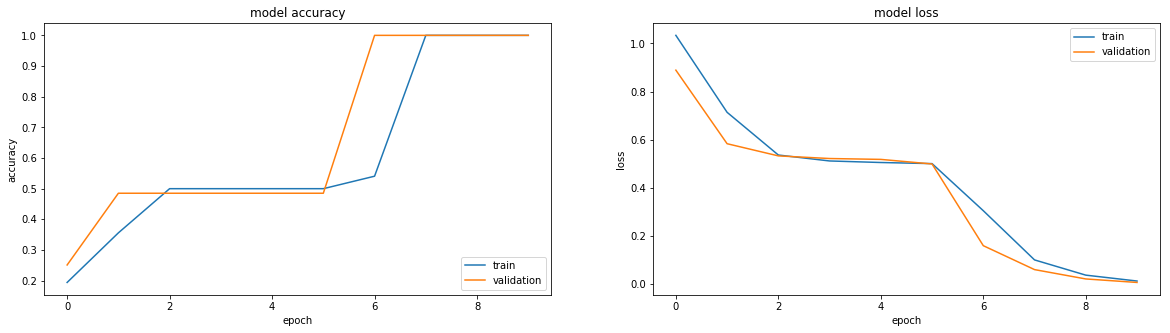

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,5))
# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()